In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.txt', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 1s - 13ms/step - loss: 0.0353
Epoch 2/100
94/94 - 0s - 956us/step - loss: 0.0163
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0119
Epoch 4/100
94/94 - 0s - 895us/step - loss: 0.0108
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0098
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0089
Epoch 7/100
94/94 - 0s - 898us/step - loss: 0.0079
Epoch 8/100
94/94 - 0s - 898us/step - loss: 0.0071
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0062
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0054
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0047
Epoch 12/100
94/94 - 0s - 896us/step - loss: 0.0041
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0035
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0031
Epoch 15/100
94/94 - 0s - 874us/step - loss: 0.0028
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0025
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0024
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0022
Epoch 19/100
94/94 - 0s - 906us/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0021
Epoch 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


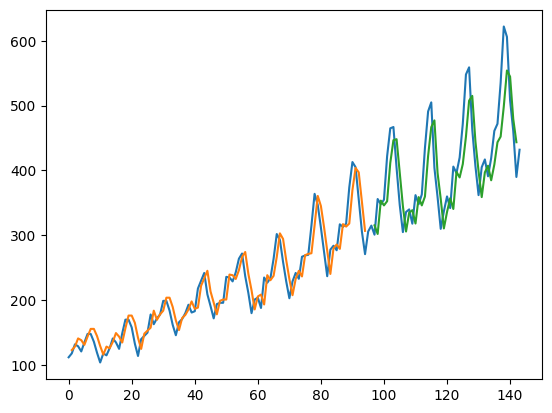

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()